<a href="https://colab.research.google.com/github/ProkopovAO/ProkopovAO/blob/main/advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Исследование деятельности рекламного агенства.**

---



В распоряжении база данных заказов рекламного агентства за один год.
Требуется провести анализ сферы деятельности, выявить слабые и сильные стороны (направления), а также сделать вывод о эффективности каждого из менеджеров. Предстоит узнать есть ли сезонность в данном бизнесе и насколько явно она выражена.  
Проверим гипотезу: доходность с изготовления баннеров больше, чем с печатей.

План работы:

1. Подготовка данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
4. Проверка гипотезы.
5. Общий вывод.


# **1. Подготовка данных**
**1.1 Импорт библиотек. Сохраним данные из excel-файла в датафрейм в переменную df**

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [433]:
# прочитаем excel-файл
df = pd.read_excel('рекламное агентство.xlsx')

**1.2 Изучим общую информацию о полученном датафрейме.**


In [434]:
# вывод первых 20 строчек датафрейма df на экран.
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Дизайнер заказа,Описание заказа,Стоимость заказа,Номер счета,Стоимость макета,Стоимость монтажа,Оплата,...,Клиент,Статус заказа,Классификатор,Оборудование,Источник трафика,Регистрация заказа,код клиента,Проект,Себестоимость заказа,Рентабельность
0,8513,2022-02-08,Дударев,NaN,Замена прожектора по гарантии,0.0,0,0.0,0,0.0,...,629.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0
1,8433,2022-01-14,Ксенев,NaN,Наклейки и трафпреты Пенза Горизонт,0.0,0,0.0,0,0.0,...,1327.0,Производство,Наклейка,NaN,Постоянный клиент,Зарегистрирован,0.0,NaN,0,0
2,8547,NaT,NaN,NaN,NaN,0.0,0,0.0,0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0
3,8585,2022-03-01,Дударев,Сухорукова,Аншлаг Орловская 30,0.0,0,0.0,0,0.0,...,791.0,Производство,Табличка,NaN,Постоянный клиент,Зарегистрирован,0.0,NaN,0,0
4,8631,2022-02-22,Дударев,NaN,Холодильник честер обкатка,0.0,0,0.0,0,0.0,...,5.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0
5,8644,2022-03-25,Кравченко,Сухорукова,Баннерное полотно 3800х1570мм Грин луанж зона ...,0.0,0,0.0,0,0.0,...,3697.0,Консультация,Баннер,NaN,Постоянный клиент,Закрыто,0.0,NaN,0,0
6,8645,2022-03-25,Кравченко,Сухорукова,Баннер 950х1800 Космачев Кафе Лотос,0.0,0,0.0,0,0.0,...,9.0,Производство,Баннер,NaN,Постоянный клиент,Зарегистрирован,0.0,NaN,0,0
7,8648,NaT,NaN,NaN,NaN,0.0,0,0.0,0,0.0,...,397.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0,0
8,8651,2022-03-28,Кравченко,Сухорукова,Плоттерка Настоящая мебель цифра 19 и -,0.0,0,0.0,0,0.0,...,3592.0,Производство,Наклейка,NaN,Постоянный клиент,Зарегистрирован,0.0,NaN,0,0
9,8653,2022-03-29,Кравченко,Сухорукова,Карты пластиковые МАТОВЫЕ 4+4 четыре вида 200 шт,0.0,0,0.0,0,0.0,...,1070.0,Дизайн,Цифровая полиграфия,NaN,Постоянный клиент,Зарегистрирован,0.0,NaN,0,0


In [435]:
# Вывод основной информации о датафрейме с помощью метода info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   код заказа            1579 non-null   int64         
 1   Дата заказа           1565 non-null   datetime64[ns]
 2   Менеджер заказа       1553 non-null   object        
 3   Дизайнер заказа       1090 non-null   object        
 4   Описание заказа       1560 non-null   object        
 5   Стоимость заказа      1578 non-null   float64       
 6   Номер счета           1579 non-null   int64         
 7   Стоимость макета      1577 non-null   float64       
 8   Стоимость монтажа     1579 non-null   int64         
 9   Оплата                1576 non-null   float64       
 10  Сумма заказа          1 non-null      float64       
 11  Задолженность         1578 non-null   float64       
 12  Клиент                1517 non-null   float64       
 13  Статус заказа     

In [436]:
# проверка датасета на дубликаты методом duplicated() и sum()
df.duplicated().sum()

0

**Вывод по текущему разделу.**  
Исследуемый датафрейм содержит данные рекламного агентства за один год.   
Датафрейм содержит разные типы данных: object - текстовые или смешанные числовые и нечисловые значения (уделим этим данным внимание), float - численные с плавающей точкой, int - численные, datetime64 - дата/время.  
Дубликатов в датасете в результате проверке не обнаружено.   
В датасете обнаружено большое количество пропусков в столбцах Сумма заказа, Проект, Классификатор, Статус заказа, Оборудование, Источник трафика, Регистрация заказа, Дизайнер заказа, необходимо исключить столбцы, либо обработать пропуски.

# **2. Предобработка данных**
**2.1 Избавимся от пустых столбцов и изучим пропущенные значения в столбцах**

Для дальнейшей работы с датафреймом можно исключить "шум", а именно столбцы, которые не несут информации необходимой для анализа, либо пустые:

- Номер счета
- Оплата
- Сумма заказа
- Задолженность
- Статус заказа
- Оборудование
- Регистрация заказа
- код клиента
- Проект
- Себестоимость заказа
- Рентабельность

In [437]:
df = df.drop(['Номер счета', 'Оплата', 'Задолженность', 'Статус заказа', 'Оборудование', 'Регистрация заказа', 'код клиента', 'Проект', 'Себестоимость заказа', 'Рентабельность'], axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Дизайнер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор,Источник трафика
0,8513,2022-02-08,Дударев,NaN,Замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,NaN,NaN
1,8433,2022-01-14,Ксенев,NaN,Наклейки и трафпреты Пенза Горизонт,0.0,0.0,0,NaN,1327.0,Наклейка,Постоянный клиент
2,8547,NaT,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN
3,8585,2022-03-01,Дударев,Сухорукова,Аншлаг Орловская 30,0.0,0.0,0,NaN,791.0,Табличка,Постоянный клиент
4,8631,2022-02-22,Дударев,NaN,Холодильник честер обкатка,0.0,0.0,0,NaN,5.0,NaN,NaN
5,8644,2022-03-25,Кравченко,Сухорукова,Баннерное полотно 3800х1570мм Грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер,Постоянный клиент
6,8645,2022-03-25,Кравченко,Сухорукова,Баннер 950х1800 Космачев Кафе Лотос,0.0,0.0,0,NaN,9.0,Баннер,Постоянный клиент
7,8648,NaT,NaN,NaN,NaN,0.0,0.0,0,NaN,397.0,NaN,NaN
8,8651,2022-03-28,Кравченко,Сухорукова,Плоттерка Настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка,Постоянный клиент
9,8653,2022-03-29,Кравченко,Сухорукова,Карты пластиковые МАТОВЫЕ 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия,Постоянный клиент


In [438]:
#определим в каких столбцах есть пропуски метом isna() и sum()
df.isna().sum()

код заказа              0
Дата заказа            14
Менеджер заказа        26
Дизайнер заказа       489
Описание заказа        19
Стоимость заказа        1
Стоимость макета        2
Стоимость монтажа       0
Сумма заказа         1578
Клиент                 62
Классификатор         516
Источник трафика      463
dtype: int64

**2.2 Изучим уникальные значения и устраним неявные дубликаты при наличии**

***2.2.1 Обработаем пустые, дублирующие и некорректные значения в столбце Менеджер заказа***

In [439]:
# поиск неявных дубликатов методом unique()
df['Менеджер заказа'].unique() # поиск неявных дубликатов методом unique() среди менеджеров

array(['Дударев', 'Ксенев', nan, 'Кравченко', 'Другой', 'Прокопов',
       'ксенеав'], dtype=object)

In [440]:
df['Менеджер заказа'].duplicated().sum() # проверка на явные дубликаты методом duplicated()

1572

In [441]:
# исправление фамилии сотрудника
# приведем менеджера "Прокопов" к значению "Другой"
df['Менеджер заказа'] = df['Менеджер заказа'].str.replace('ксенеав', 'Ксенев')
df['Менеджер заказа'] = df['Менеджер заказа'].str.replace('Прокопов', 'Другой')
df['Менеджер заказа'].duplicated().sum()

1574

Количество дубликатов увеличилось, следовательно нам удалось произвести замену в строках.

In [442]:
# Обработаем пустые значение и заполним заглушкой 'Другой'
df['Менеджер заказа'] = df['Менеджер заказа'].fillna('Другой')

In [443]:
# произведем группировку по фамилии менеджеров
manager_count = df.groupby(['Менеджер заказа']).agg({'Менеджер заказа':'count'})
manager_count

,Менеджер заказа
Менеджер заказа,
Другой,37
Дударев,463
Кравченко,1009
Ксенев,70


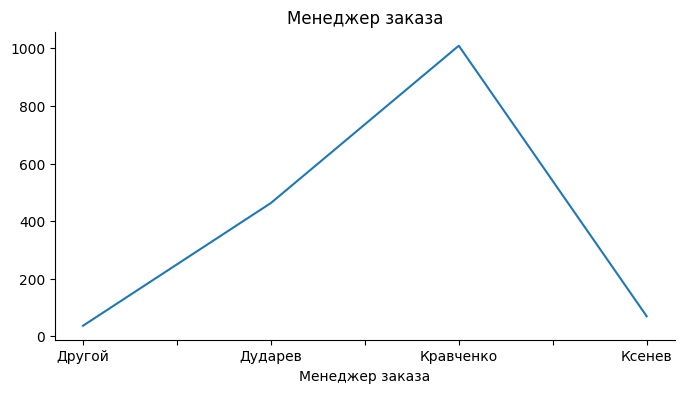

In [444]:
manager_count['Менеджер заказа'].plot(kind='line', figsize=(8, 4), title='Менеджер заказа')
plt.gca().spines[['top', 'right']].set_visible(False)

***2.2.2 Обработаем пустые, дублирующие и некорректные значения в столбце Дизайнер заказа***

In [445]:
# выполним группировку по столбцу Дизайнер заказа и посчитаем значения в нем
design_count = df.groupby(['Дизайнер заказа']).agg({'Дизайнер заказа':'count'})
design_count

,Дизайнер заказа
Дизайнер заказа,
Сухорукова,1090


Столбец "Дизайнер заказа" малоинформативен, т.к. работает только один дизайнер. Удалим его.

In [446]:
df = df.drop(['Дизайнер заказа'], axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор,Источник трафика
0,8513,2022-02-08,Дударев,Замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,NaN,NaN
1,8433,2022-01-14,Ксенев,Наклейки и трафпреты Пенза Горизонт,0.0,0.0,0,NaN,1327.0,Наклейка,Постоянный клиент
2,8547,NaT,Другой,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN
3,8585,2022-03-01,Дударев,Аншлаг Орловская 30,0.0,0.0,0,NaN,791.0,Табличка,Постоянный клиент
4,8631,2022-02-22,Дударев,Холодильник честер обкатка,0.0,0.0,0,NaN,5.0,NaN,NaN
5,8644,2022-03-25,Кравченко,Баннерное полотно 3800х1570мм Грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер,Постоянный клиент
6,8645,2022-03-25,Кравченко,Баннер 950х1800 Космачев Кафе Лотос,0.0,0.0,0,NaN,9.0,Баннер,Постоянный клиент
7,8648,NaT,Другой,NaN,0.0,0.0,0,NaN,397.0,NaN,NaN
8,8651,2022-03-28,Кравченко,Плоттерка Настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка,Постоянный клиент
9,8653,2022-03-29,Кравченко,Карты пластиковые МАТОВЫЕ 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия,Постоянный клиент


***2.2.3 Обработаем данные в столбце Источник трафика***

In [447]:
# выполним группировку по столбцу Источник трафика и посчитаем значения в нем
traffic_count = df.groupby(['Источник трафика']).agg({'Источник трафика':'count'})
traffic_count

,Источник трафика
Источник трафика,
Другое,3
Постоянный клиент,1112
Сайт,1


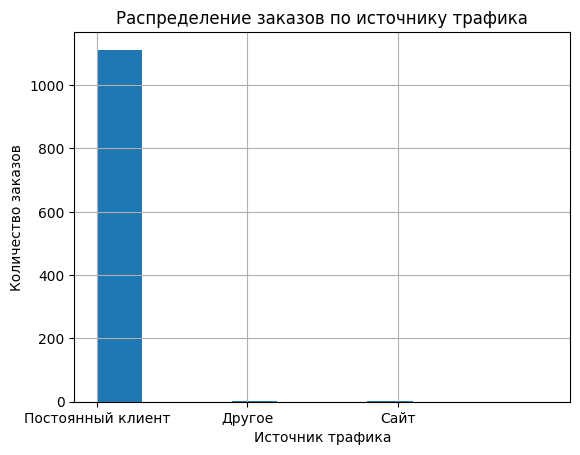

In [448]:
df['Источник трафика'].hist(bins = 10, range=(0, 3))
plt.title('Распределение заказов по источнику трафика')
plt.xlabel('Источник трафика')
plt.ylabel('Количество заказов')
plt.show()

Столбец "Источник трафика" малоинформативен, нет дополнительной информации по пропущенным значениям. Удалим его.

In [449]:
df = df.drop(['Источник трафика'], axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор
0,8513,2022-02-08,Дударев,Замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,NaN
1,8433,2022-01-14,Ксенев,Наклейки и трафпреты Пенза Горизонт,0.0,0.0,0,NaN,1327.0,Наклейка
2,8547,NaT,Другой,NaN,0.0,0.0,0,NaN,NaN,NaN
3,8585,2022-03-01,Дударев,Аншлаг Орловская 30,0.0,0.0,0,NaN,791.0,Табличка
4,8631,2022-02-22,Дударев,Холодильник честер обкатка,0.0,0.0,0,NaN,5.0,NaN
5,8644,2022-03-25,Кравченко,Баннерное полотно 3800х1570мм Грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер
6,8645,2022-03-25,Кравченко,Баннер 950х1800 Космачев Кафе Лотос,0.0,0.0,0,NaN,9.0,Баннер
7,8648,NaT,Другой,NaN,0.0,0.0,0,NaN,397.0,NaN
8,8651,2022-03-28,Кравченко,Плоттерка Настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка
9,8653,2022-03-29,Кравченко,Карты пластиковые МАТОВЫЕ 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия


***2.2.4 Обработаем данные в столбце Описание заказа***

In [450]:
# для удобства значения столбца Описание заказа сделаем строчными буквами
df['Описание заказа'] = df['Описание заказа'].str.lower()

In [451]:
#удалим пустые значения в столбце "Описание заказа". Их количество меньше 2%, потерей данных можно пренебречь.
df=df.dropna(subset=['Описание заказа'])
df.isna().sum()

код заказа              0
Дата заказа             0
Менеджер заказа         0
Описание заказа         0
Стоимость заказа        0
Стоимость макета        2
Стоимость монтажа       0
Сумма заказа         1559
Клиент                 54
Классификатор         497
dtype: int64

***2.2.5 Заполним пустые значения столбца "Классификатор" значениями соответствующими типу работ.***

In [452]:
# поиск неявных дубликатов методом unique() в столбце Классификатор
df['Классификатор'].unique()

array([nan, 'Наклейка', 'Табличка', 'Баннер', 'Цифровая полиграфия',
       'Лазерная гравировка', 'Печати', 'Световые конструкции',
       'Офсетная полиграфия', 'Друое'], dtype=object)

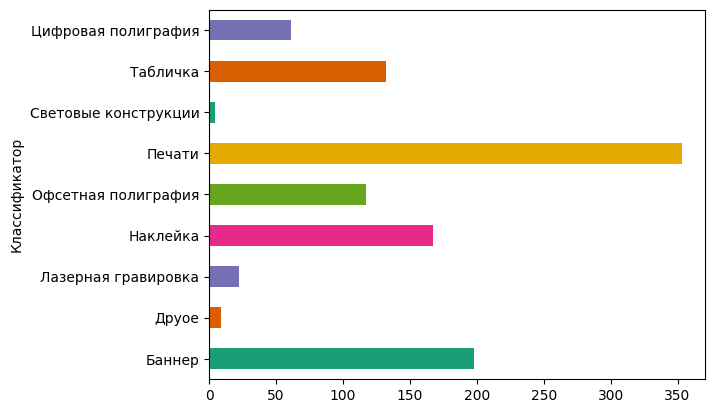

In [453]:
df.groupby('Классификатор').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# вызов метода show() для удаления технической строчки
plt.show()

In [454]:
# исправление опечаток в значениях столбца Классификатор
df['Классификатор'] = df['Классификатор'].str.replace('Друое' or 'другой', 'Другое')
# Обработаем пустые значение и заполним 0
df['Классификатор'] = df['Классификатор'].fillna(0)
df['Классификатор'].duplicated().sum()

1550

In [455]:
# создадим функцию class_type которая классифицирует виды работ и добавляет значение в новый столбец с категориями class_category
def class_type(row):
    if "вывеск" in row['Описание заказа']: # добавим логическое условие для сортировки
        return 'Вывеска'
    elif "баннер" in row['Описание заказа']:
        return 'Баннер'
    elif "наклейк" in row['Описание заказа'] or "пленк" in row['Описание заказа'] or "обкатк" in row['Описание заказа'] or "плоттер" in row['Описание заказа'] or "термо" in row['Описание заказа'] or "брендир" in row['Описание заказа']:
        return 'Наклейка'
    elif "табличк" in row['Описание заказа'] or "аншлаг" in row['Описание заказа'] or "композит" in row['Описание заказа']:
        return 'Табличка'
    elif "печат" in row['Описание заказа'] or "штамп" in row['Описание заказа'] or "клиш" in row['Описание заказа'] or "факсим" in row['Описание заказа']:
        return 'Печати'
    elif "гравировк" in row['Описание заказа'] or "шильд" in row['Описание заказа'] or "бейдж" in row['Описание заказа']:
        return 'Лазерная гравировка'
    elif "визитк" in row['Описание заказа'] or "листовк" in row['Описание заказа'] or "карты" in row['Описание заказа'] or "букл" in row['Описание заказа'] or "флаер" in row['Описание заказа']:
        return 'Полиграфия'
    else:
        return 'Другое'
# добавим значение которое возвращаем функция в созданный столбец
# чтобы на вход в функцию отправлялись строки, нужно указать параметр axis = 1 функции apply
df['class_category'] = df.apply(class_type, axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор,class_category
0,8513,2022-02-08,Дударев,замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,0,Другое
1,8433,2022-01-14,Ксенев,наклейки и трафпреты пенза горизонт,0.0,0.0,0,NaN,1327.0,Наклейка,Наклейка
3,8585,2022-03-01,Дударев,аншлаг орловская 30,0.0,0.0,0,NaN,791.0,Табличка,Табличка
4,8631,2022-02-22,Дударев,холодильник честер обкатка,0.0,0.0,0,NaN,5.0,0,Наклейка
5,8644,2022-03-25,Кравченко,баннерное полотно 3800х1570мм грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер,Баннер
6,8645,2022-03-25,Кравченко,баннер 950х1800 космачев кафе лотос,0.0,0.0,0,NaN,9.0,Баннер,Баннер
8,8651,2022-03-28,Кравченко,плоттерка настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка,Наклейка
9,8653,2022-03-29,Кравченко,карты пластиковые матовые 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия,Полиграфия
10,8694,2022-04-12,Кравченко,гравировка на алюминии 100х50мм гримме-русь 5 ...,0.0,0.0,0,NaN,2820.0,Лазерная гравировка,Лазерная гравировка
12,9517,2023-02-07,Кравченко,"наклейки в рулоне схвати игрушку , 20 руб",0.0,0.0,0,NaN,429.0,Наклейка,Наклейка


In [456]:
# создадим функцию class_return, которая заполнит нулевые значения столбца Классификатор, при наличии значений приоритет остается за текущим значениями столбца Классификатор
def class_return(i):
    if i['Классификатор'] == 0: # добавим логическое условие для сортировки
        return i['class_category']
    else:
        return i['Классификатор']
# добавим значение которое возвращаем функция в созданный столбец
# чтобы на вход в функцию отправлялись строки, нужно указать параметр axis = 1 функции apply
df['Классификатор'] = df.apply(class_return, axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор,class_category
0,8513,2022-02-08,Дударев,замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,Другое,Другое
1,8433,2022-01-14,Ксенев,наклейки и трафпреты пенза горизонт,0.0,0.0,0,NaN,1327.0,Наклейка,Наклейка
3,8585,2022-03-01,Дударев,аншлаг орловская 30,0.0,0.0,0,NaN,791.0,Табличка,Табличка
4,8631,2022-02-22,Дударев,холодильник честер обкатка,0.0,0.0,0,NaN,5.0,Наклейка,Наклейка
5,8644,2022-03-25,Кравченко,баннерное полотно 3800х1570мм грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер,Баннер
6,8645,2022-03-25,Кравченко,баннер 950х1800 космачев кафе лотос,0.0,0.0,0,NaN,9.0,Баннер,Баннер
8,8651,2022-03-28,Кравченко,плоттерка настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка,Наклейка
9,8653,2022-03-29,Кравченко,карты пластиковые матовые 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия,Полиграфия
10,8694,2022-04-12,Кравченко,гравировка на алюминии 100х50мм гримме-русь 5 ...,0.0,0.0,0,NaN,2820.0,Лазерная гравировка,Лазерная гравировка
12,9517,2023-02-07,Кравченко,"наклейки в рулоне схвати игрушку , 20 руб",0.0,0.0,0,NaN,429.0,Наклейка,Наклейка


Удалим сервисный столбец "class_category", т.к. в дальнейшем он не представляет интерес для исследования.

In [457]:
df = df.drop(['class_category'], axis=1)
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор
0,8513,2022-02-08,Дударев,замена прожектора по гарантии,0.0,0.0,0,NaN,629.0,Другое
1,8433,2022-01-14,Ксенев,наклейки и трафпреты пенза горизонт,0.0,0.0,0,NaN,1327.0,Наклейка
3,8585,2022-03-01,Дударев,аншлаг орловская 30,0.0,0.0,0,NaN,791.0,Табличка
4,8631,2022-02-22,Дударев,холодильник честер обкатка,0.0,0.0,0,NaN,5.0,Наклейка
5,8644,2022-03-25,Кравченко,баннерное полотно 3800х1570мм грин луанж зона ...,0.0,0.0,0,NaN,3697.0,Баннер
6,8645,2022-03-25,Кравченко,баннер 950х1800 космачев кафе лотос,0.0,0.0,0,NaN,9.0,Баннер
8,8651,2022-03-28,Кравченко,плоттерка настоящая мебель цифра 19 и -,0.0,0.0,0,NaN,3592.0,Наклейка
9,8653,2022-03-29,Кравченко,карты пластиковые матовые 4+4 четыре вида 200 шт,0.0,0.0,0,NaN,1070.0,Цифровая полиграфия
10,8694,2022-04-12,Кравченко,гравировка на алюминии 100х50мм гримме-русь 5 ...,0.0,0.0,0,NaN,2820.0,Лазерная гравировка
12,9517,2023-02-07,Кравченко,"наклейки в рулоне схвати игрушку , 20 руб",0.0,0.0,0,NaN,429.0,Наклейка


In [458]:
# приведем данные столбца Классификатор к типу category
df['Классификатор'] = df['Классификатор'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   код заказа         1560 non-null   int64         
 1   Дата заказа        1560 non-null   datetime64[ns]
 2   Менеджер заказа    1560 non-null   object        
 3   Описание заказа    1560 non-null   object        
 4   Стоимость заказа   1560 non-null   float64       
 5   Стоимость макета   1558 non-null   float64       
 6   Стоимость монтажа  1560 non-null   int64         
 7   Сумма заказа       1 non-null      float64       
 8   Клиент             1506 non-null   float64       
 9   Классификатор      1560 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 123.8+ KB


***2.2.6 Заполним пустые значения столбца "Сумма заказа" суммой значений соответствующими всему циклу работ.***

In [459]:
# Обработаем пустые значение столбцов Стоимость заказа, Стоимость макета, Стоимость монтажа и заполним 0
df['Стоимость заказа'] = df['Стоимость заказа'].fillna(0)
df['Стоимость макета'] = df['Стоимость макета'].fillna(0)
df['Стоимость монтажа'] = df['Стоимость монтажа'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   код заказа         1560 non-null   int64         
 1   Дата заказа        1560 non-null   datetime64[ns]
 2   Менеджер заказа    1560 non-null   object        
 3   Описание заказа    1560 non-null   object        
 4   Стоимость заказа   1560 non-null   float64       
 5   Стоимость макета   1560 non-null   float64       
 6   Стоимость монтажа  1560 non-null   int64         
 7   Сумма заказа       1 non-null      float64       
 8   Клиент             1506 non-null   float64       
 9   Классификатор      1560 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 123.8+ KB


In [460]:
# выполним заполнение пустых ячеек столбца Сумма заказа суммой df['Стоимость заказа'] + df['Стоимость макета'] + df['Стоимость монтажа']
df['Сумма заказа'] = df['Стоимость заказа'] + df['Стоимость макета'] + df['Стоимость монтажа']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1578
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   код заказа         1560 non-null   int64         
 1   Дата заказа        1560 non-null   datetime64[ns]
 2   Менеджер заказа    1560 non-null   object        
 3   Описание заказа    1560 non-null   object        
 4   Стоимость заказа   1560 non-null   float64       
 5   Стоимость макета   1560 non-null   float64       
 6   Стоимость монтажа  1560 non-null   int64         
 7   Сумма заказа       1560 non-null   float64       
 8   Клиент             1506 non-null   float64       
 9   Классификатор      1560 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 123.8+ KB


In [461]:
# значения 0 заменим пустыми значениями Nan для удобства работы в дальнейшем
df.loc[df['Сумма заказа'] == 0, 'Сумма заказа'] = np.nan

Заполним столбец Сумма заказа медианными значениями разбив на группы по категориям

In [462]:
# группировка по категориями и заполнения пустых ячеек медианными значениями
df['Сумма заказа'] = df['Сумма заказа'].fillna(df.groupby('Классификатор')['Сумма заказа'].transform('median'))
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор
0,8513,2022-02-08,Дударев,замена прожектора по гарантии,0.0,0.0,0,5772.0,629.0,Другое
1,8433,2022-01-14,Ксенев,наклейки и трафпреты пенза горизонт,0.0,0.0,0,1500.0,1327.0,Наклейка
3,8585,2022-03-01,Дударев,аншлаг орловская 30,0.0,0.0,0,3420.0,791.0,Табличка
4,8631,2022-02-22,Дударев,холодильник честер обкатка,0.0,0.0,0,1500.0,5.0,Наклейка
5,8644,2022-03-25,Кравченко,баннерное полотно 3800х1570мм грин луанж зона ...,0.0,0.0,0,3971.0,3697.0,Баннер
6,8645,2022-03-25,Кравченко,баннер 950х1800 космачев кафе лотос,0.0,0.0,0,3971.0,9.0,Баннер
8,8651,2022-03-28,Кравченко,плоттерка настоящая мебель цифра 19 и -,0.0,0.0,0,1500.0,3592.0,Наклейка
9,8653,2022-03-29,Кравченко,карты пластиковые матовые 4+4 четыре вида 200 шт,0.0,0.0,0,1355.0,1070.0,Цифровая полиграфия
10,8694,2022-04-12,Кравченко,гравировка на алюминии 100х50мм гримме-русь 5 ...,0.0,0.0,0,925.0,2820.0,Лазерная гравировка
12,9517,2023-02-07,Кравченко,"наклейки в рулоне схвати игрушку , 20 руб",0.0,0.0,0,1500.0,429.0,Наклейка


**Вывод по текущему разделу.**  
Исключили столбцы с пустыми ячейкам, а также столбцы, которые не представляют интереса для исследования.  
Выполнили проверку на неявные дубликаты, внесли исправления в ошибочно написанные фамилии менеджеров.
Предварительно определили, что наибольшее количество заказчиков «приводит» в агентство менеджер Кравченко.   
Исключили Столбец "Дизайнер заказа", т.к. работает только один дизайнер.  
Исключили столбец "Источник трафика", т.к. он малоинформативен, нет дополнительной информации по пропущенным значениям.
Исключили пустые значения в столбце "Описание заказа".  
Заполнили пустые значения столбца "Классификатор" значениями, соответствующими типу работ.  
Заполнили пустые значения столбца "Сумма заказа" суммой значений соответствующими всему циклу работ.
Пропущенные ячейки столбца "Сумма заказа" заполним медианными значениями разбив на группы по категориям.


# **3. Исследовательский анализ данных.**


***3.1 Узнаем какие виды деятельности рекламного агенства приносят наибольшую прибыль.***

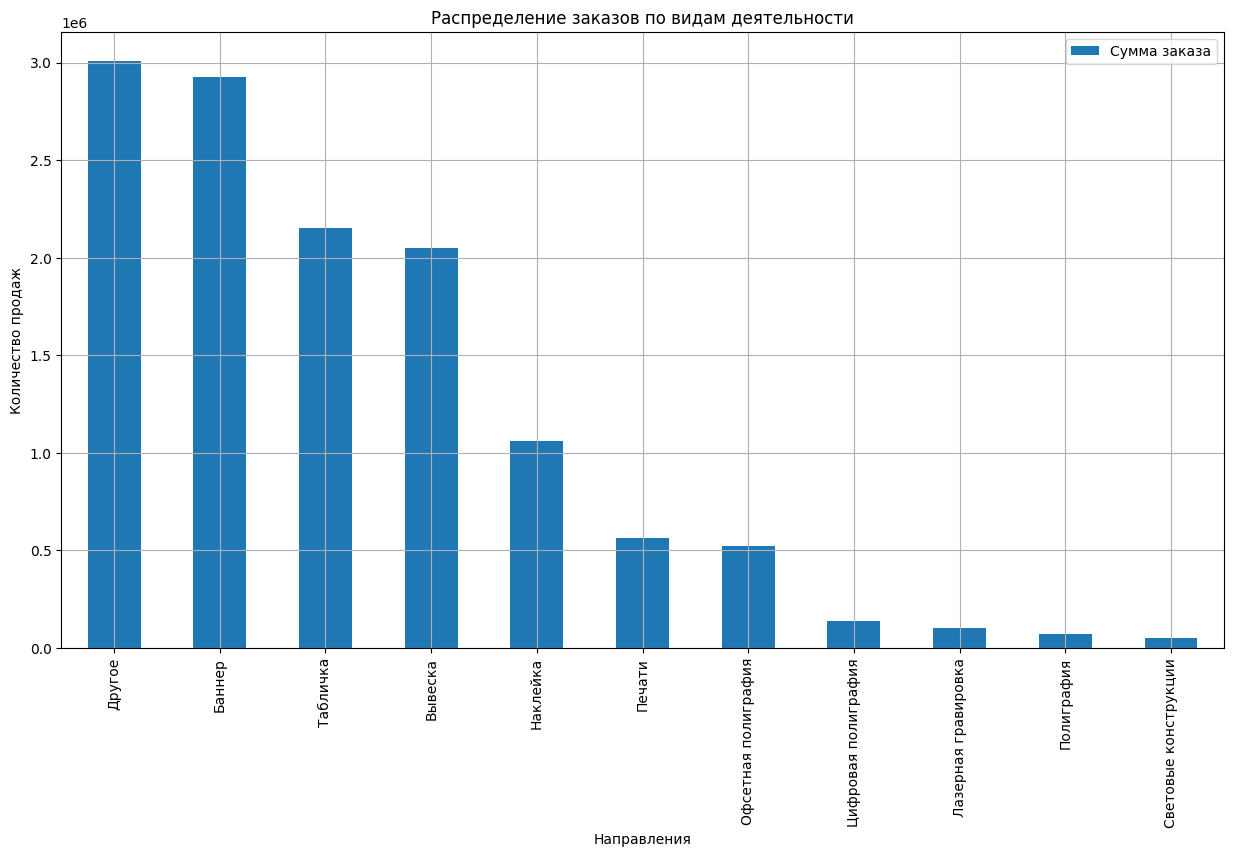

In [463]:
# используем сводную таблицу перед посторением графика
df.pivot_table(index='Классификатор', values='Сумма заказа', aggfunc='sum').sort_values('Сумма заказа', ascending=False).plot(kind='bar', grid=True, figsize=(15, 8))
plt.title('Распределение заказов по видам деятельности')
plt.xlabel('Направления')
plt.ylabel('Количество продаж')
plt.show()

***3.2 Определим какой менеджер приносит наибольшую прибыль компании.***

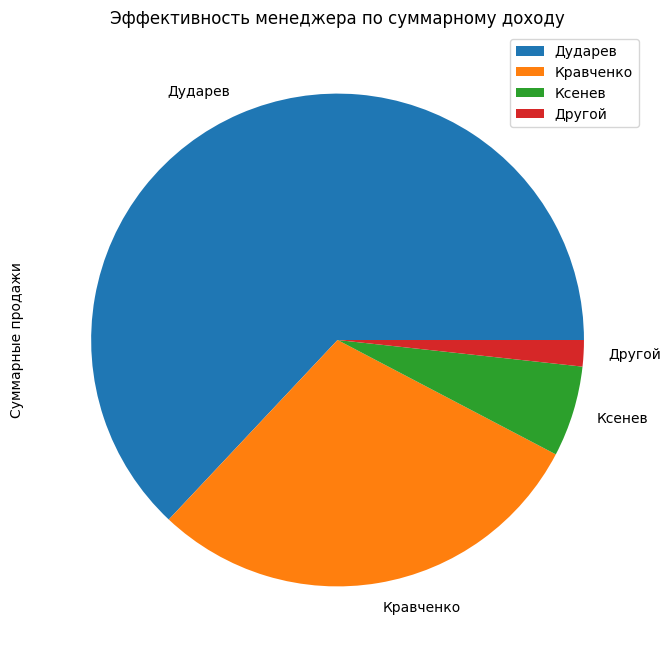

In [464]:
# используем сводную таблицу перед посторением графика
df.pivot_table(index='Менеджер заказа', values='Сумма заказа', aggfunc='sum').sort_values('Сумма заказа', ascending=False).head().plot(kind='pie', subplots = True, figsize=(8, 8))
plt.title('Эффективность менеджера по суммарному доходу')
plt.ylabel('Суммарные продажи')
plt.show()

***3.3 Определим сезонность в бизнесе.***


Выделим месяц оформления заказа в отдельный столбец.

In [465]:
# месяц найдем с помощью атрибута month pd.DatetimeInde
df['Месяц'] = pd.DatetimeIndex(df['Дата заказа']).month
df.head(20)

,код заказа,Дата заказа,Менеджер заказа,Описание заказа,Стоимость заказа,Стоимость макета,Стоимость монтажа,Сумма заказа,Клиент,Классификатор,Месяц
0,8513,2022-02-08,Дударев,замена прожектора по гарантии,0.0,0.0,0,5772.0,629.0,Другое,2
1,8433,2022-01-14,Ксенев,наклейки и трафпреты пенза горизонт,0.0,0.0,0,1500.0,1327.0,Наклейка,1
3,8585,2022-03-01,Дударев,аншлаг орловская 30,0.0,0.0,0,3420.0,791.0,Табличка,3
4,8631,2022-02-22,Дударев,холодильник честер обкатка,0.0,0.0,0,1500.0,5.0,Наклейка,2
5,8644,2022-03-25,Кравченко,баннерное полотно 3800х1570мм грин луанж зона ...,0.0,0.0,0,3971.0,3697.0,Баннер,3
6,8645,2022-03-25,Кравченко,баннер 950х1800 космачев кафе лотос,0.0,0.0,0,3971.0,9.0,Баннер,3
8,8651,2022-03-28,Кравченко,плоттерка настоящая мебель цифра 19 и -,0.0,0.0,0,1500.0,3592.0,Наклейка,3
9,8653,2022-03-29,Кравченко,карты пластиковые матовые 4+4 четыре вида 200 шт,0.0,0.0,0,1355.0,1070.0,Цифровая полиграфия,3
10,8694,2022-04-12,Кравченко,гравировка на алюминии 100х50мм гримме-русь 5 ...,0.0,0.0,0,925.0,2820.0,Лазерная гравировка,4
12,9517,2023-02-07,Кравченко,"наклейки в рулоне схвати игрушку , 20 руб",0.0,0.0,0,1500.0,429.0,Наклейка,2


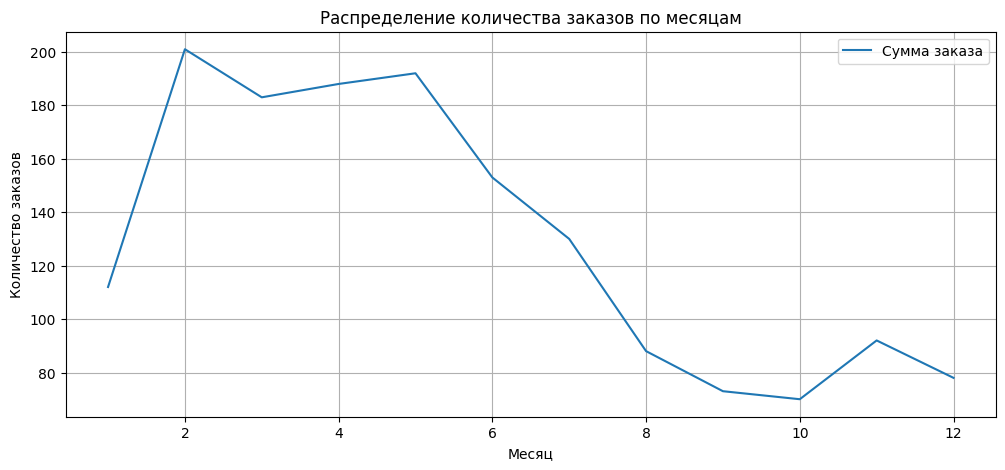

In [466]:
# используем сводную таблицу перед посторением графика
df.pivot_table(index='Месяц', values='Сумма заказа', aggfunc='count').plot(grid=True, figsize=(12, 5))
plt.title('Распределение количества заказов по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.show()

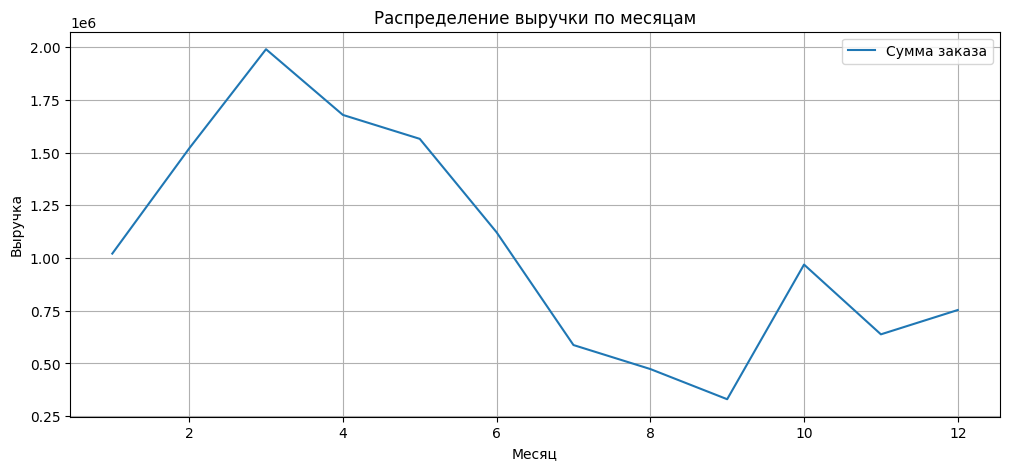

In [467]:
# используем сводную таблицу перед посторением графика
df.pivot_table(index='Месяц', values='Сумма заказа', aggfunc='sum').plot(grid=True, figsize=(12, 5))
plt.title('Распределение выручки по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.show()

**Вывод по текущему разделу.**  
Определили, что изготовление наружной рекламы (баннеры, вывески) приносит больший доход агентству.  
Вопреки предварительному выводу эффективный менеджер Дударев, он приносит максимальную прибыль компании, Кравченко - большой молодец:), у него больше заказов, но с меньшими чеками.  
О сезонности в бизнесе, полагаясь на данные за один год, говорить сложно. Видно наращивание объемов в начале года с пиком к апрелю и плавное падание к сентябрю, потом резкий подъемом к концу года.
Данные за 2022 и 2023 год, есть большая вероятность, что геополитическая ситуация в стране оказала значительное влияние на деятельность компании.


# **4. Проверка гипотезы.**

**4.1 Доходы с изготовления печатей и баннеров одинаковые одинаковые.**  
H_0: Доходность баннеров (Сумма заказа) = доходности (Сумма заказа) печатей  
H_a: Доходность баннеров (Сумма заказа) ≠ доходности (Сумма заказа) печатей
alpha = 0.05

In [468]:
# вызов модуля stats библиотеки scipy
from scipy import stats as st
# results = вызов метода для проверки гипотезы
banner_profit = df[df['Классификатор'] =='Баннер']['Сумма заказа'].array
stamp_profit = df[df['Классификатор'] =='Печати']['Сумма заказа'].array
results = st.ttest_ind(banner_profit, stamp_profit, equal_var = False)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран
print(results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.7677549242779383e-21
Отвергаем нулевую гипотезу


На основании специального метода для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам выяснили:
- доходность с изготовления баннеров не равна доходности с изготовления печатей.

# **5. Общий вывод.**

По результатам проведенного анализа установили, что:
- производство наружной рекламы (баннеры, таблички, вывески) более прибыльно, сфера деятельности «Другое» включает несколько заказов в одном, что и характерно для максимальной выручки для данной категории.
- стоит обратить внимание на все виды полиграфии и печати с лазерной гравировкой, у них низкая доходность, вероятно связано с небольшим спросом на данную продукцию, либо требует дополнительного развития данных направлений.
- можно выделить Дударева и Кравченко как эффективных менеджеров и по итогам года поощрить, а Ксенева, вероятно, ждет не очень приятный разговор)  
- сезонность в бизнесе трудно выделить, полагаясь на данные за один год, выделим резкий спад по количеству заказов и выручке к концу весны 2022 года, есть большая вероятность, что геополитическая ситуация в стране оказала значительное влияние на деятельность компании.
- на основании проверки гипотез выяснили, что доходы с изготовления печатей и баннеров не равны (что подтверждают распределение по заказам и выручке на гистограммах в разделе EDA).
